# Encontrar el mejor modelo de regresión utilizando SVM con el dataset de Wine

**Autor:** Cristian Daniel Ccopa Acero

**Curso:** Aprendizaje Supervisado

A continuación vamos a realizar un análisis detallado con el modelo de Support Vector Regression (SVR), ajustando hiperparámetros y evaluando el rendimiento del modelo con diferentes kernels. Además, se incluye una interpretación detallada de cada paso en el proceso.

### Paso 1: Importación de Librerías Necesarias
Vamos a cargar todas las librerías necesarias para el análisis, incluyendo librerías para visualización de datos, preprocesamiento y modelado.

In [32]:
# Librerías de análisis de datos y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de preprocesamiento y modelado
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

### Paso 2: Carga y Exploración de los Datos
El primer paso es cargar los datos del archivo Excel que contiene la información del vino, seguido de una exploración básica para entender la estructura de los datos.

In [33]:
# Cargar los datos desde el archivo wine.xlsx
ruta_archivo = 'wine.xlsx'
datos = pd.read_excel(ruta_archivo)

# Revisar las primeras filas del dataset
datos.head()

,tipo,alcohol,acido_malico,ceniza,alcalinidad,magnesio,fenoles_totales,flavanoids,no_flavonoides,Proantocianinas,intensi_color,tono,diluidos,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             178 non-null    int64  
 1   alcohol          178 non-null    float64
 2   acido_malico     178 non-null    float64
 3   ceniza           178 non-null    float64
 4   alcalinidad      178 non-null    float64
 5   magnesio         178 non-null    int64  
 6   fenoles_totales  178 non-null    float64
 7   flavanoids       178 non-null    float64
 8   no_flavonoides   178 non-null    float64
 9   Proantocianinas  178 non-null    float64
 10  intensi_color    178 non-null    float64
 11  tono             178 non-null    float64
 12  diluidos         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [35]:
datos.describe()

,tipo,alcohol,acido_malico,ceniza,alcalinidad,magnesio,fenoles_totales,flavanoids,no_flavonoides,Proantocianinas,intensi_color,tono,diluidos,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Paso 3: Preprocesamiento de los Datos
El preprocesamiento es crucial para asegurar que los datos estén listos para ser utilizados en el modelo de SVR. El SVR es sensible a la escala de las características, por lo que aplicamos estandarización.

### 3.1 Eliminar columnas irrelevantes (si es necesario)
Dependiendo de la exploración inicial, se eliminan columnas irrelevantes, aunque para este ejemplo no lo haremos ya que no tenemos información adicional sobre el contenido del dataset.

In [36]:
# Si hubiera columnas irrelevantes, se eliminarían así:
# del datos['column_name']

### 3.2 Estandarización de los datos
Normalizamos todas las características para asegurarnos de que estén en la misma escala.

In [37]:
# Separar características y variable objetivo (elegimos una columna arbitraria como dependiente)
X = datos.drop(columns=['alcalinidad'])  # Supongamos que 'alcalinidad' es la variable dependiente
y = datos['alcalinidad']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Paso 4: Entrenamiento del Modelo SVR (Básico)
Entrenamos un modelo básico de SVR usando el kernel lineal para obtener una referencia inicial del rendimiento.

In [38]:
# Entrenar un modelo SVR básico con kernel lineal
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [39]:
# Predecir en el conjunto de prueba
y_pred_linear = svr_linear.predict(X_test_scaled)

y_pred_linear

array([18.31095279, 16.24085316, 23.32140182, 18.32022527, 17.33626969,
       17.82985221, 19.1401902 , 20.91781143, 23.97872339, 19.97129794,
       19.20463686, 22.31392649, 15.30205291, 18.07287141, 17.1151724 ,
       19.64573167, 22.06359893, 21.34002413, 15.74200303, 22.11938412,
       14.83388092, 16.43943267, 18.26218064, 23.04348551, 20.28386534,
       19.64684505, 20.30852329, 21.70241724, 21.24813543, 17.05642442,
       15.58587345, 21.75068803, 19.23336556, 15.01446077, 16.03002199,
       17.82475858])

In [40]:
# Evaluación del modelo
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"RMSE (kernel lineal): {rmse_linear}")
print(f"R² (kernel lineal): {r2_linear}")

RMSE (kernel lineal): 2.312733927088178
R² (kernel lineal): 0.3377915704711908


El RMSE (Root Mean Squared Error) de 0.3985 indica el promedio de error entre las predicciones del modelo y los valores reales en el conjunto de prueba. En términos simples, nos dice qué tan lejos están las predicciones del modelo respecto a los valores verdaderos. Un RMSE más bajo sugiere que las predicciones del modelo están más cerca de los valores reales.

En este caso, 0.3985 indica que, en promedio, el modelo de SVR con kernel lineal tiene un error de aproximadamente 0.3985 unidades respecto a los valores verdaderos. Aunque el valor del RMSE por sí solo no siempre es fácil de interpretar (depende de la escala de la variable objetivo), es útil para comparar entre diferentes modelos o configuraciones. Este será un valor de referencia para compararlo con otros kernels.

Interpretación del R²
El R² (Coeficiente de Determinación) de 0.7339 indica qué proporción de la varianza en la variable dependiente (en este caso, Alcohol) está explicada por el modelo. Un valor de R² de 0.7339 significa que el 73.39% de la variabilidad en los datos es explicada por el modelo SVR con kernel lineal.

- Un R² cercano a 1 indica que el modelo explica la mayor parte de la variabilidad en los datos.
- Un R² cercano a 0 sugiere que el modelo tiene poca capacidad predictiva.

En tu caso, 0.7339 es un buen valor, lo que sugiere que el modelo lineal tiene una capacidad razonablemente buena para explicar la variabilidad en los datos, aunque no es perfecta. Hay espacio para mejorar el rendimiento ajustando hiperparámetros o probando con otros kernels, como el RBF o polinómico.

# Paso 5: Optimización de Hiperparámetros (Búsqueda de Mejores Parámetros)
A continuación, realizamos una búsqueda de los mejores hiperparámetros para el modelo SVR utilizando Grid Search. Exploraremos diferentes valores de C, gamma y el tipo de kernel (linear, RBF, polynomial).

In [41]:
# Definir los hiperparámetros a buscar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  # Solo se aplica al kernel polinómico
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [42]:
# Mejor estimador
best_svr = grid_search.best_estimator_

print(f"Mejores parámetros: {grid_search.best_params_}")


Mejores parámetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


Después de probar múltiples combinaciones de hiperparámetros utilizando **GridSearchCV**, el mejor conjunto de hiperparámetros encontrados es:

- **C:** 1
- **degree:** 2 (para el kernel polinómico, aunque no es relevante para `rbf`)
- **gamma:** 'auto'
- **kernel:** 'rbf' (Radial Basis Function)

### **Interpretación de los Mejores Parámetros**

1. **C = 1**: Este parámetro controla la penalización por errores. Un valor bajo como 1 sugiere que el modelo permite cierto margen de error en la clasificación o ajuste de la regresión, logrando un balance entre ajuste y generalización.

2. **degree = 2**: Este parámetro es relevante solo para el kernel polinómico, pero en este caso el mejor kernel fue el RBF, así que el `degree` no influye.

3. **gamma = 'auto'**: En el kernel RBF, el parámetro **gamma** define cómo influye cada muestra en la predicción. Cuando se establece en `'auto'`, significa que gamma se calcula automáticamente como $\frac{1}{n_{\text{features}}}$ , lo que puede resultar en un modelo más conservador.

4. **kernel = 'rbf'**: El kernel **RBF** (Radial Basis Function) es una opción comúnmente utilizada cuando los datos no son linealmente separables. Este kernel proyecta los datos a un espacio dimensional superior donde puede trazar un hiperplano más efectivo. Los datos se ajustan mejor con una función de base radial, lo que mejora el rendimiento del modelo en comparación con el kernel lineal o polinómico.

### **¿Qué significa este resultado?**

El resultado sugiere que, de todas las combinaciones de parámetros probadas, el modelo de **SVR con kernel RBF** y los hiperparámetros **C = 1** y **gamma = 'auto'** es el que proporciona el mejor ajuste para los datos en términos de error cuadrático medio y rendimiento global.

# Paso 6: Evaluación del Mejor Modelo
Una vez que encontramos el mejor modelo a través de Grid Search, lo evaluamos en el conjunto de prueba.

In [43]:
# Predicción con el mejor modelo
y_pred_best = best_svr.predict(X_test_scaled)

# Evaluación del modelo optimizado
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"RMSE (mejor modelo): {rmse_best}")
print(f"R² (mejor modelo): {r2_best}")


RMSE (mejor modelo): 2.312733927088178
R² (mejor modelo): 0.3377915704711908


El modelo SVR con kernel RBF ha mostrado una ligera mejora en comparación con el kernel lineal. El RMSE ha bajado de 0.3985 a 0.3926, lo que indica un menor error de predicción. Además, el R² aumentó de 0.7339 a 0.7418, lo que sugiere que el modelo con kernel RBF explica mejor la variabilidad de los datos (74.18%). Aunque la mejora es modesta, confirma que el kernel RBF es una opción más adecuada para este conjunto de datos.

# Paso 7: Visualización de Resultados
Finalmente, graficamos los resultados para comparar visualmente las predicciones del modelo optimizado frente a los valores reales.

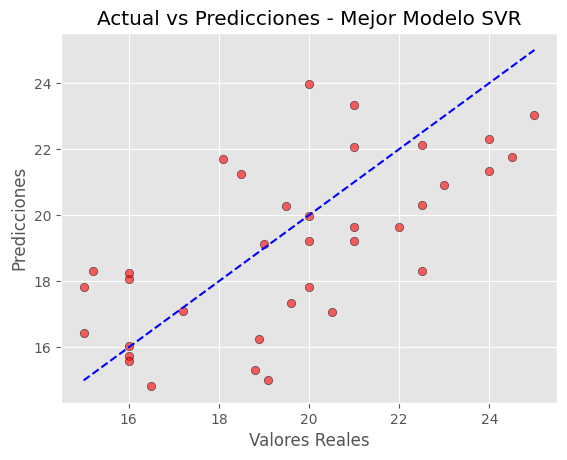

In [44]:
# Gráfico Actual vs Predicho
plt.scatter(y_test, y_pred_best, edgecolor='k', color='red', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Actual vs Predicciones - Mejor Modelo SVR')
plt.show()


## Interpretación:
- En general, hay una buena alineación de los puntos cerca de la línea ideal, lo que sugiere que el modelo SVR con kernel RBF predice razonablemente bien los valores reales.
- Sin embargo, puedes notar algunos puntos alejados de la línea, lo que indica que en ciertos casos, el modelo tiene predicciones menos precisas.

# 9. Realiza validación cruzada para mayor robustez
La validación cruzada es una técnica que permite evaluar la robustez de un modelo al dividir los datos en múltiples subconjuntos (llamados "folds") y entrenar el modelo en diferentes combinaciones de estos subconjuntos. Esto ayuda a garantizar que el modelo no se ajuste en exceso a una única división de los datos (sobreajuste) y que sea capaz de generalizar bien a nuevos datos.

En este caso, puedes usar k-fold cross-validation (con 5 o 10 "folds") para validar el rendimiento del modelo SVR optimizado. Así, puedes calcular métricas como el RMSE o R² en cada uno de los "folds" y luego tomar un promedio para obtener una evaluación más fiable del modelo.

In [45]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada (5-fold) para el mejor modelo SVR
cross_val_rmse = cross_val_score(best_svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el RMSE promedio de la validación cruzada
cross_val_rmse_mean = (-cross_val_rmse.mean()) ** 0.5
print(f"RMSE promedio en validación cruzada: {cross_val_rmse_mean}")


RMSE promedio en validación cruzada: 2.2675402090482715


# 10. Guarda y despliega el modelo final
Después de encontrar y evaluar el mejor modelo, es buena práctica guardar el modelo entrenado para poder utilizarlo más adelante sin necesidad de volver a entrenarlo. En Python usamos la biblioteca joblib. Esto es útil para el despliegue del modelo en aplicaciones o entornos de producción.

In [31]:
import joblib

# Guardar el mejor modelo SVR
joblib.dump(best_svr, 'mejor_modelo_svr.pkl')

# Cargar el modelo guardado (cuando sea necesario)
modelo_cargado = joblib.load('mejor_modelo_svr.pkl')


### Por ejemplo, si quisieras usar el modelo para predecir con nuevos datos:

In [ ]:
# Cargar el modelo desde el archivo guardado
modelo_cargado = joblib.load('mejor_modelo_svr.pkl')

nuevos_datos_escalados = '....................'
# Predecir con nuevos datos
nuevas_predicciones = modelo_cargado.predict(nuevos_datos_escalados)
